# Import libaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load data

In [2]:
# Path to the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

# Read the data from URL and select specific featuress
data = pd.read_csv(url, usecols=["Fresh", "Milk"])

# Normalize the Data

In [3]:
# Normalize feature values to [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN Clustering

In [4]:
# Cluster customers using DBSCAN, with MinPts = 5 and adjusting Epsilon accordingly
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Identify outliers

In [5]:
outliers = data[clusters == -1]
print("Outliers identified by DBSCAN:")
print(outliers)

Outliers identified by DBSCAN:
      Fresh   Milk
23    26373  36423
47    44466  54259
61    35942  38369
85    16117  46197
86    22925  73498
125   76237   3473
181  112151  29627
183   36847  43950
284   68951   4411


# Visualize the Results

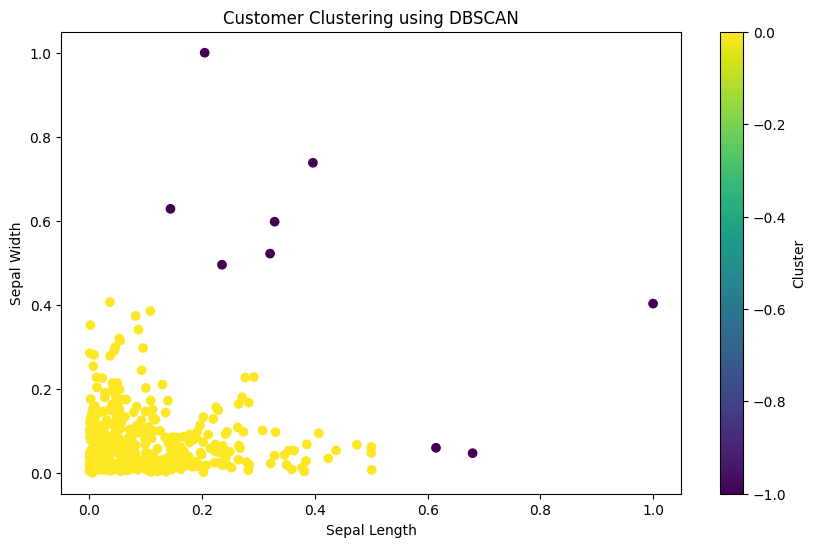

In [6]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Customer Clustering using DBSCAN')
plt.colorbar(label='Cluster')
plt.show()

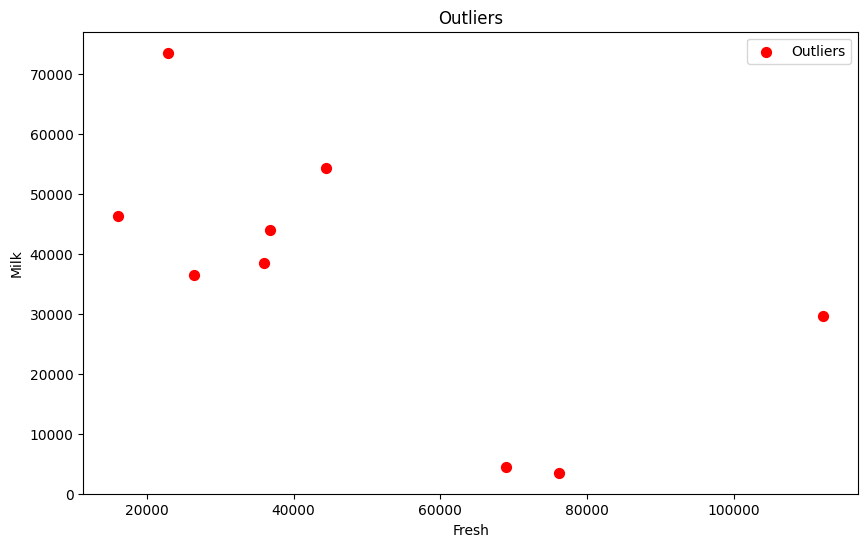

In [7]:
## Outliers plot
plt.figure(figsize=(10, 6))
plt.scatter(outliers["Fresh"], outliers["Milk"], color='red', label='Outliers', s=50, marker='o')  # Mark outliers
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Outliers')
plt.legend()
plt.show()